In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

warnings.filterwarnings("ignore")

In [6]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
u_data = pd.read_csv('ml-100k/ml-100k/u.data', sep='\t', names=columns)

In [15]:
columns_item = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 
                    'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 
                    'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 
                    'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
                    'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
u_item = pd.read_csv('ml-100k/ml-100k/u.item', sep='|', names=columns_item, encoding='latin-1')

In [30]:
columns_user = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
u_user = pd.read_csv('./ml-100k/ml-100k/u.user', sep='|', names=columns_user)

In [7]:
u_data.head(5)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
u_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [20]:
u_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
item_id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


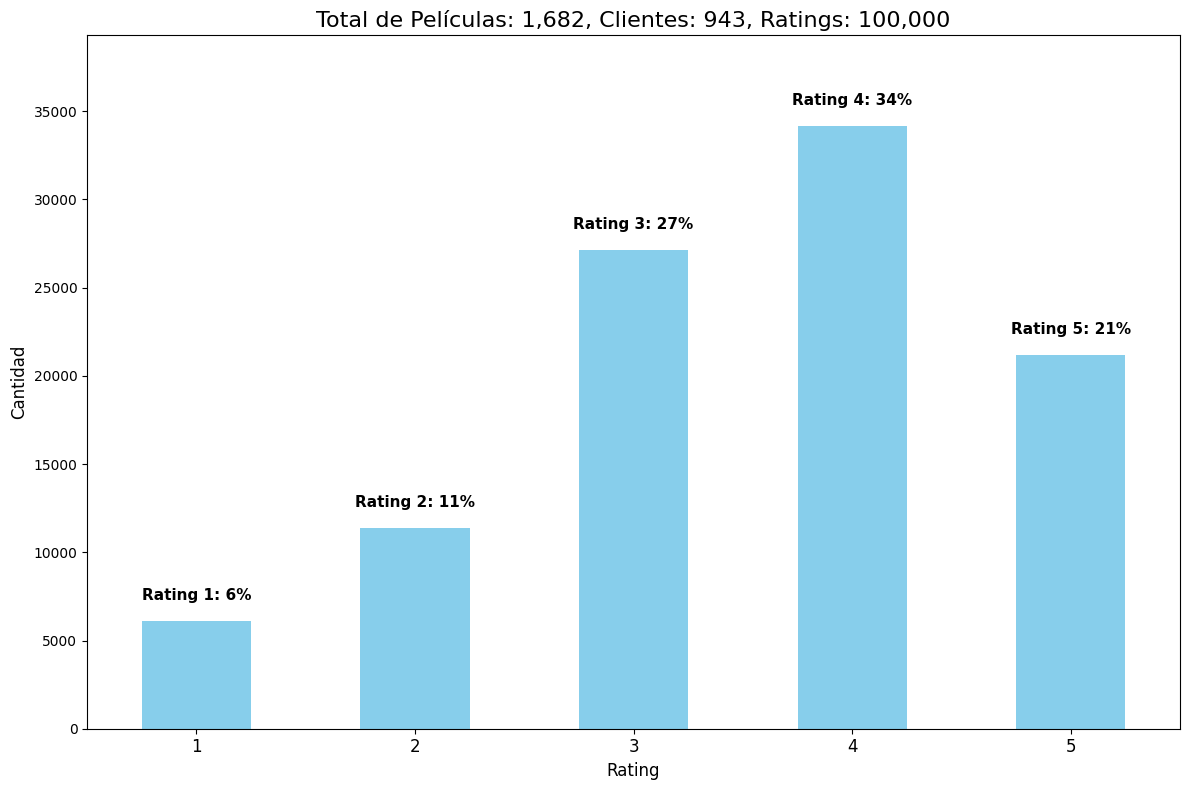

In [18]:
# Agrupar los datos por rating y contar la cantidad de cada uno
conteo_ratings = u_data.groupby('rating')['rating'].agg(['count'])

# Obtener el total de películas (asumiendo que cada película tiene un ID único)
total_peliculas = u_data['item_id'].nunique()

# Obtener el total de clientes únicos
total_clientes = u_data['user_id'].nunique()

# Obtener el total de ratings
total_ratings = u_data['rating'].count()

# Crear gráfico de barras vertical con un tamaño mayor para evitar que el texto se solape
ax = conteo_ratings.plot(kind='bar', legend=False, figsize=(12, 8), color='skyblue')

# Configurar título y etiquetas en español
plt.title('Total de Películas: {:,}, Clientes: {:,}, Ratings: {:,}'.format(total_peliculas, total_clientes, total_ratings), fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Rotar los números del eje x para que estén verticales
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)

# Añadir porcentajes sobre cada barra, ajustando la posición para evitar que se salga del gráfico
for i in range(len(conteo_ratings)):
    ax.text(i, conteo_ratings.iloc[i][0] + 1000, 
            'Rating {}: {:.0f}%'.format(i+1, conteo_ratings.iloc[i][0] * 100 / conteo_ratings.sum()[0]), 
            color='black', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Asegurar que los límites del eje y permitan mostrar todos los textos
ax.set_ylim(0, conteo_ratings.max()[0] * 1.15)

# Ajustar los márgenes para que el texto y las barras se vean mejor
plt.tight_layout()

plt.show()

# Analisis de las peliculas y sus generos

In [37]:
# Inspeccionar las primeras filas
print(u_item.head())



   movie_id        movie_title release_date  video_release_date  \
0         1   Toy Story (1995)   1995-01-01                 NaN   
1         2   GoldenEye (1995)   1995-01-01                 NaN   
2         3  Four Rooms (1995)   1995-01-01                 NaN   
3         4  Get Shorty (1995)   1995-01-01                 NaN   
4         5     Copycat (1995)   1995-01-01                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Horror  Musical  Mystery  Romance  \
0          0          1           1  ...       0        0        0        0   


In [38]:
# Descripción general de las columnas
print(u_item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_id            1682 non-null   int64         
 1   movie_title         1682 non-null   object        
 2   release_date        1681 non-null   datetime64[ns]
 3   video_release_date  0 non-null      float64       
 4   IMDb_URL            1679 non-null   object        
 5   unknown             1682 non-null   int64         
 6   Action              1682 non-null   int64         
 7   Adventure           1682 non-null   int64         
 8   Animation           1682 non-null   int64         
 9   Children's          1682 non-null   int64         
 10  Comedy              1682 non-null   int64         
 11  Crime               1682 non-null   int64         
 12  Documentary         1682 non-null   int64         
 13  Drama               1682 non-null   int64       

In [22]:
# Resumen estadístico de las columnas numéricas
print(u_item.describe())

# Resumen de las columnas categóricas
print(u_item.describe(include='object'))

          movie_id  video_release_date      unknown       Action    Adventure  \
count  1682.000000                 0.0  1682.000000  1682.000000  1682.000000   
mean    841.500000                 NaN     0.001189     0.149227     0.080262   
std     485.695893                 NaN     0.034473     0.356418     0.271779   
min       1.000000                 NaN     0.000000     0.000000     0.000000   
25%     421.250000                 NaN     0.000000     0.000000     0.000000   
50%     841.500000                 NaN     0.000000     0.000000     0.000000   
75%    1261.750000                 NaN     0.000000     0.000000     0.000000   
max    1682.000000                 NaN     1.000000     1.000000     1.000000   

         Animation   Children's       Comedy        Crime  Documentary  ...  \
count  1682.000000  1682.000000  1682.000000  1682.000000  1682.000000  ...   
mean      0.024970     0.072533     0.300238     0.064804     0.029727  ...   
std       0.156081     0.259445  

In [23]:
u_item['release_date'] = pd.to_datetime(u_item['release_date'], format='%d-%b-%Y', errors='coerce')


## Distribucion Genero

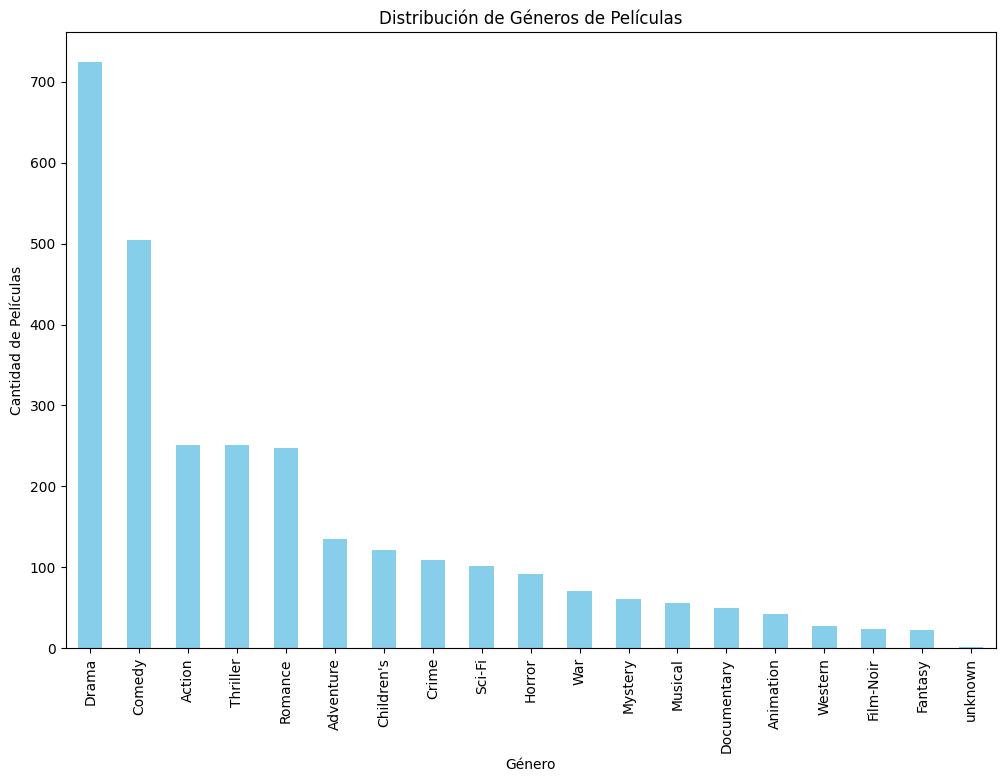

In [24]:
# Contar cuántas películas pertenecen a cada género
genre_columns = columns_item[5:]  # Géneros empiezan desde la columna 5 en adelante
genre_counts = u_item[genre_columns].sum().sort_values(ascending=False)

# Gráfico de barras de la distribución de géneros
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Géneros de Películas')
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.show()

## Año de lanzamiento

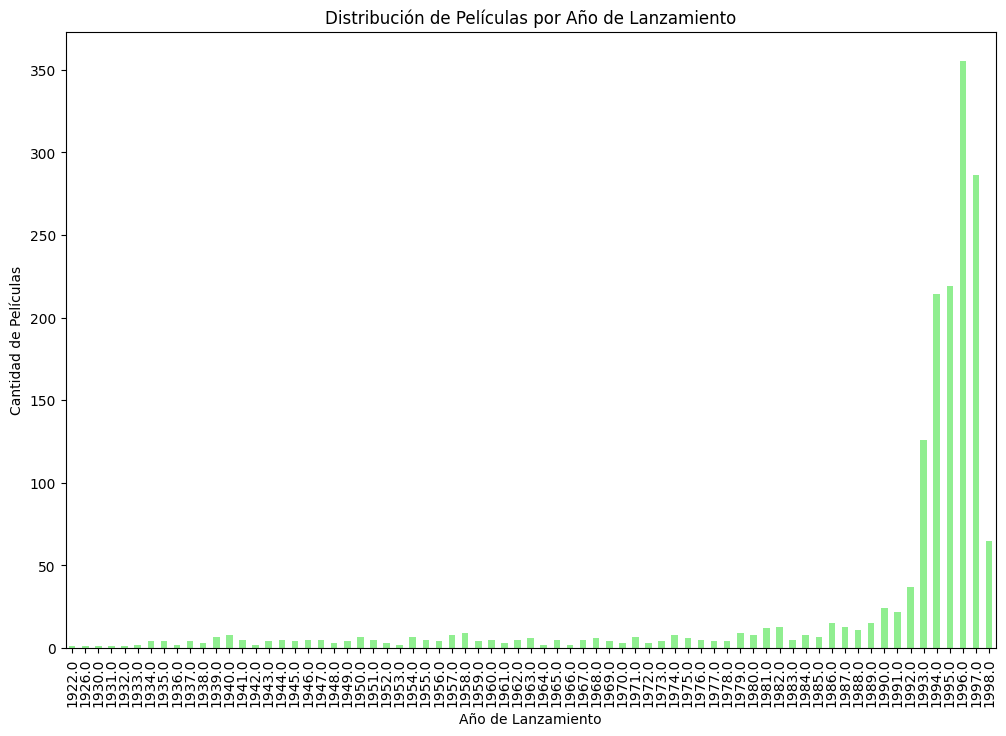

In [25]:
# Extraer el año de la fecha de lanzamiento
u_item['release_year'] = u_item['release_date'].dt.year

# Contar las películas lanzadas por año
release_year_counts = u_item['release_year'].value_counts().sort_index()

# Gráfico de la distribución de películas por año de lanzamiento
plt.figure(figsize=(12, 8))
release_year_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Películas por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.show()

## Correlacion entre generos

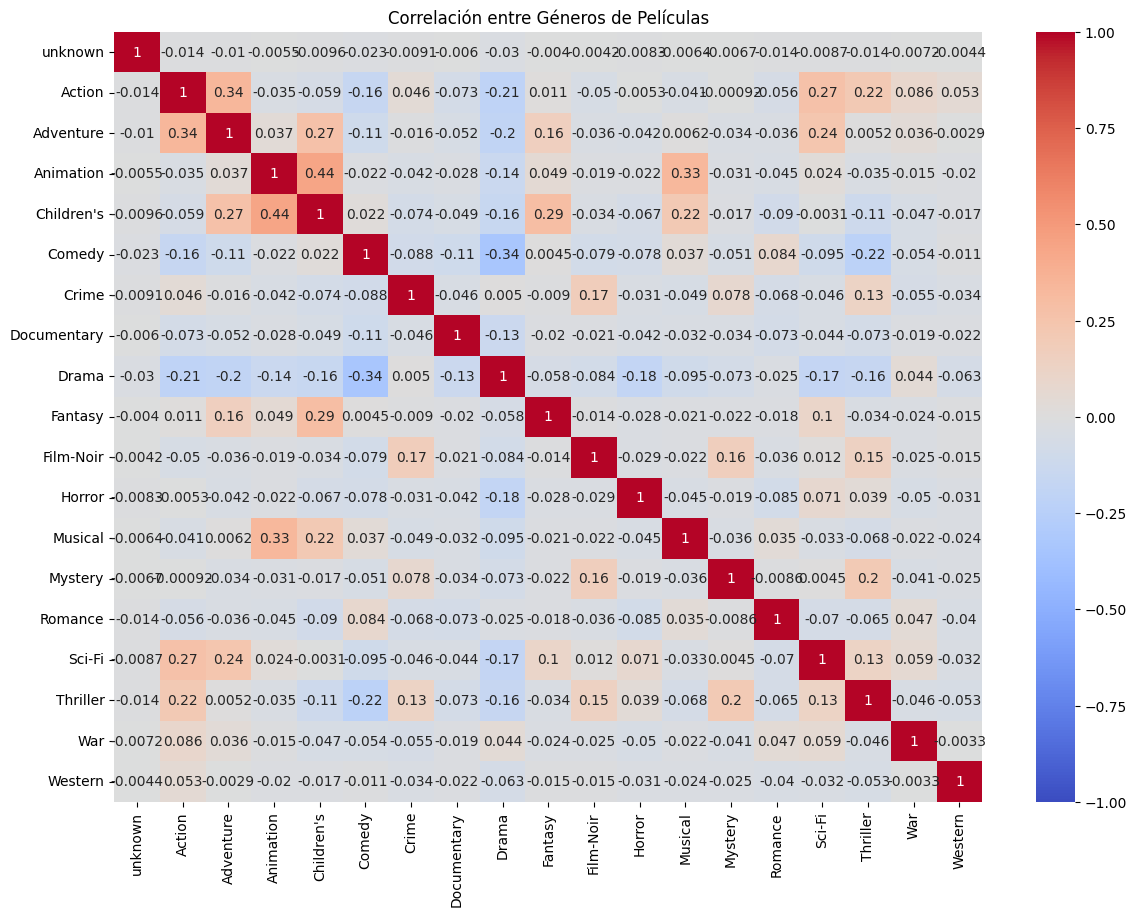

In [26]:
# Matriz de correlación entre los géneros
genre_correlation = u_item[genre_columns].corr()



plt.figure(figsize=(14, 10))
sns.heatmap(genre_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación entre Géneros de Películas')
plt.show()

Vemos como la mayoria de los generos no tienen mucha relacion entre si, salvo casos particulares como el genero para ninos y la animacion lo que tiene sentido ya que muchas de peliculas infantiles son para ninos.

count    1682.000000
mean        1.719976
std         0.868207
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: genre_count, dtype: float64


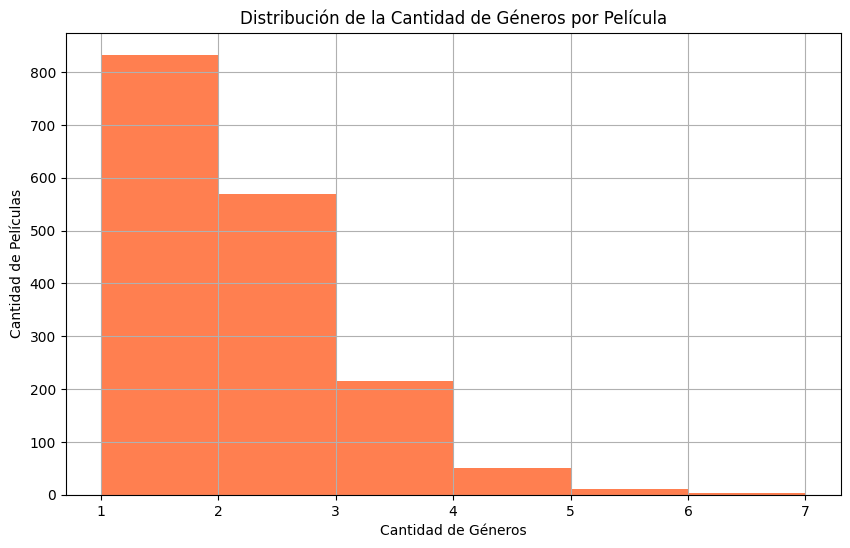

In [28]:
# Contar el número de géneros asignados a cada película
u_item['genre_count'] = u_item[genre_columns].sum(axis=1)

# Resumen estadístico de la cantidad de géneros por película
print(u_item['genre_count'].describe())

# Histograma de la cantidad de géneros por película
plt.figure(figsize=(10, 6))
u_item['genre_count'].hist(bins=range(1, u_item['genre_count'].max() + 2), color='coral')
plt.title('Distribución de la Cantidad de Géneros por Película')
plt.xlabel('Cantidad de Géneros')
plt.ylabel('Cantidad de Películas')
plt.show()

In [29]:
# Mostrar las películas con más géneros
top_genre_movies = u_item.sort_values(by='genre_count', ascending=False).head(10)
print(top_genre_movies[['movie_title', 'genre_count']])


                               movie_title  genre_count
425    Transformers: The Movie, The (1986)            6
559   Kid in King Arthur's Court, A (1995)            6
171        Empire Strikes Back, The (1980)            6
819                       Space Jam (1996)            5
16              From Dusk Till Dawn (1996)            5
49                        Star Wars (1977)            5
1075                Pagemaster, The (1994)            5
100                     Heavy Metal (1981)            5
992                        Hercules (1997)            5
183                Army of Darkness (1993)            5


# Analisis de los usuarios

In [31]:
print(u_user.head())

# Descripción general de las columnas
print(u_user.info())

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


In [32]:
# Resumen estadístico de las columnas numéricas
print(u_user.describe())

# Resumen de las columnas categóricas
print(u_user.describe(include='object'))

          user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
       gender occupation zip_code
count     943        943      943
unique      2         21      795
top         M    student    55414
freq      670        196        9


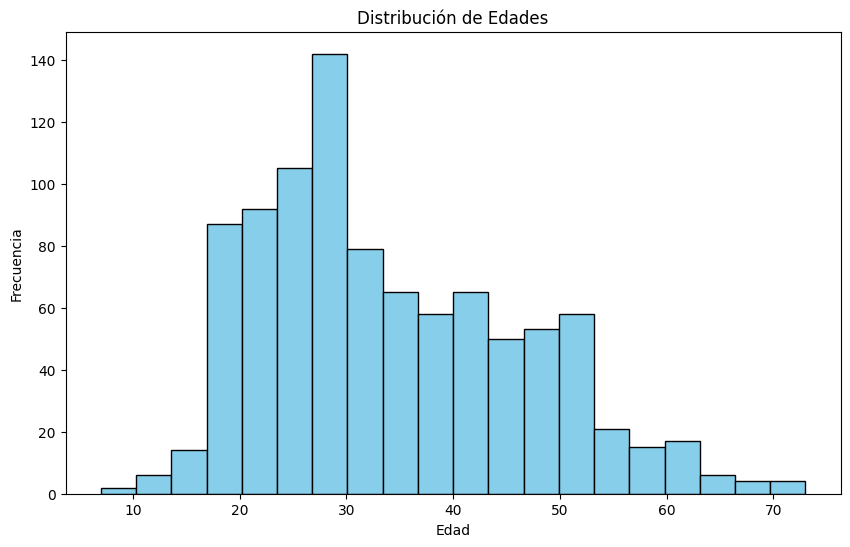

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64


In [33]:
# Histograma de la distribución de edades
plt.figure(figsize=(10, 6))
u_user['age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Resumen estadístico de la edad
print(u_user['age'].describe())

Se puede observar un rango muy amplio de edades.

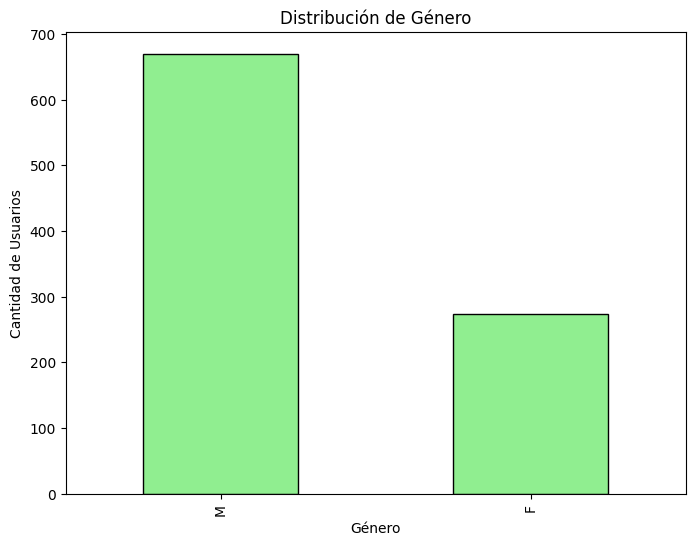

gender
M    71.049841
F    28.950159
Name: count, dtype: float64


In [34]:
# Contar cuántos usuarios hay de cada género
gender_counts = u_user['gender'].value_counts()

# Gráfico de barras de la distribución por género
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Usuarios')
plt.show()

# Porcentaje de usuarios por género
print(gender_counts / gender_counts.sum() * 100)

La mayoria de nuestros usuarios son hombres, lo que podria hacer que el modelo tenga sesgo.

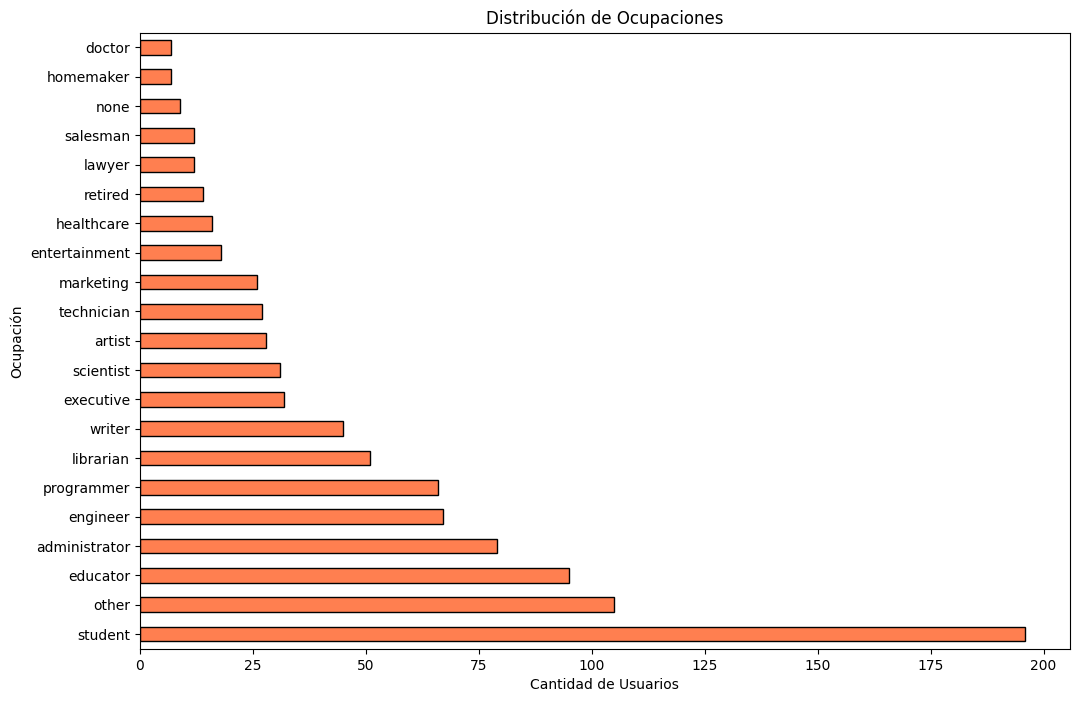

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
Name: count, dtype: int64


In [35]:
# Contar cuántos usuarios hay en cada ocupación
occupation_counts = u_user['occupation'].value_counts()

# Gráfico de barras de la distribución de ocupaciones
plt.figure(figsize=(12, 8))
occupation_counts.plot(kind='barh', color='coral', edgecolor='black')
plt.title('Distribución de Ocupaciones')
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('Ocupación')
plt.show()

# Mostrar las 10 ocupaciones más comunes
print(occupation_counts.head(10))

La mayoria de nuestros usuarios son estudiantes dado el rango tan amplio de edad que tenemos se podria asumir que pueden ser estudiantes en niveles iniciales, superiores y universitarios.

## Edades por genero

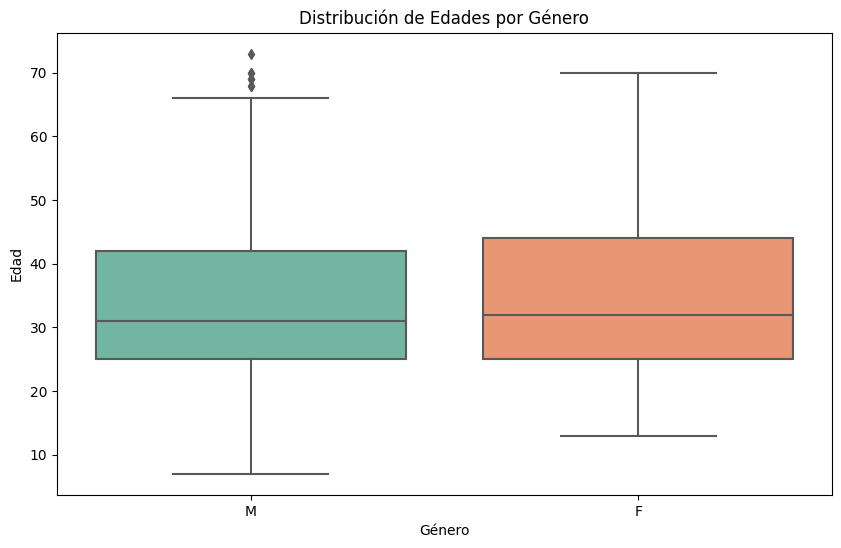

In [36]:
# Boxplot de la distribución de edades por género
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=u_user, palette='Set2')
plt.title('Distribución de Edades por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

# Conclusiones

Realizar el análisis exploratorio fue esencial para comprender mejor nuestros datos y las relaciones entre las características de los usuarios. A partir de este análisis, podemos concluir que existe una mayor cantidad de información en las características de los usuarios en comparación con la información disponible sobre las películas. Esto sugiere que nuestro sistema de recomendación colaborativo debería enfocarse principalmente en las relaciones entre usuarios. Además, en caso de que un nuevo usuario se una a la plataforma, podremos identificar usuarios similares para proporcionarle recomendaciones personalizadas de manera efectiva.